# Project Ttitle: Diamonds Prices

### Briefly describe how your code can be run in each section, what is the sequence to run?
### Run the code from the beginning. The code first load the data and then drop for unnamed column and check for null value to drop. Afterward, it will check for categorical variables and plots the data for carat, cut, color, clarity, depth, table, price, x, y, and z. Afterward, it will check for numerical continuous feature. Later, it will do transformation of the data and see the relation with respect to price once again. Afterward, we look at heatmap and then we looking into outliers and drop them using the IQR method. Then we encodeing cateogrical features and spliting our dependent and independent feature. Afterward, we did the regularization with ridge and lasso. Then we did the cross validation and run all 6 methods and look for the best method and then we use the diamond to predict the price to get the value. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Describe your data source and how you will handle missing value, tranform data, or detect outliter 
#### Data is collected from Kaggle dataset containing prices and attributes for approximately 54,000 round-cut diamonds.
#### Website: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices
#### The dataset has 10 features in total: carat, cut, color, clarity, depth, table, price, x, y, and z.
#### Carat: Weight of diamond. Cut: Quality of the cut. Color: A to Z (Clear to Yellow). Clarity: How clear the dimonds. Depth: Total depth percentage. Table: Width of top of diamond relative to widest point. Price: US dollars. Last three features X, Y, Z: are for length, width, depth in mm.
#### Data Cleaning - The dataset has an unnamed column which is used to label the order, which is unnecessary so we have dropped it. It does not contain any null value rows so we did not have to drop them. We also used the IQR method to drop all the outliers. 
#### Feature Engineering - The numerical continuous variable is transformed using numpy.log for better visualization. After transformation it is easier to see the trends in data. Since the variables are high variance, it is not effective nor efficient to do binning to category. 
#### Dimension Reduction - For this project we did not apply any dimension reduction since it is not necessary. The data is not high dimensional and therefore dimensionality does not play a significant role in the final result. 
#### Variable Selection - After using a heat map to show the correlation between independent and dependent variables, “table” and “depth” showed little correlation to price. However since we did not have many features we decided to keep it. On the other hand, x, y, and z have very high correlation with the price.
#### Regularization - We use Ridge and Lasso regularization. Lasso regression may set coefficients to zero while ridge regression will never set coefficients to zero. Elastic net attempts to combine both ridge and lasso penalties. 
#### Before transformation, the data remains the same pattern in production. After transformation, it has some little change in values but the general pattern is still the same

In [2]:
df=pd.read_csv("Diamonds Prices2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,26972.000000,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,15572.147122,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26972.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,53943.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
##Droping the Unnamed column  because we already have default index in the dataframe
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
#Checking null values 
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#Checking categorical variables 
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('number of categorical variables:',len(categorical_features))

number of categorical variables: 3


In [8]:
df[categorical_features].head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


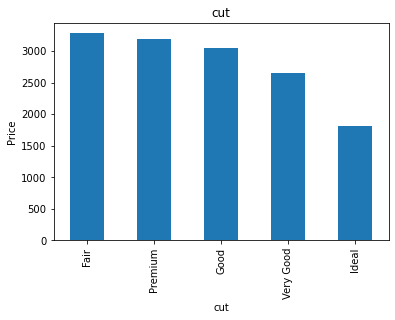

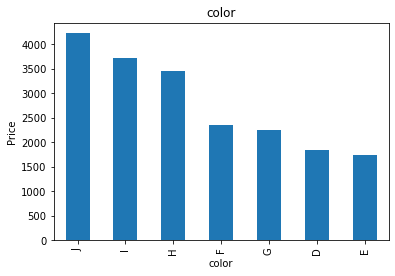

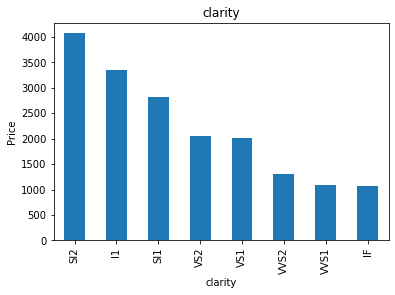

In [9]:
for feature in categorical_features:
  data=df.copy()
  data.groupby(feature)['price'].median().sort_values(ascending=False).plot.bar()
  plt.xlabel(feature)
  plt.ylabel("Price")
  plt.title(feature)
  plt.show()

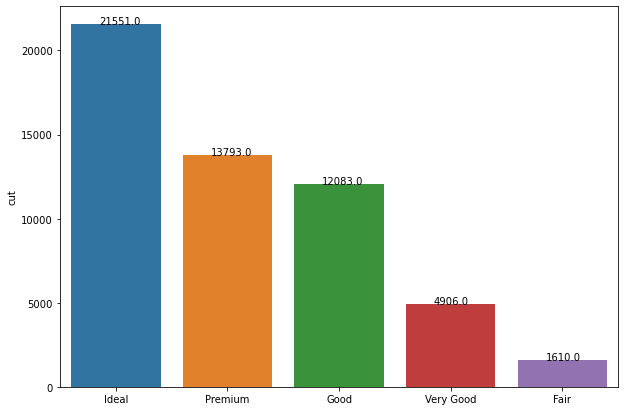

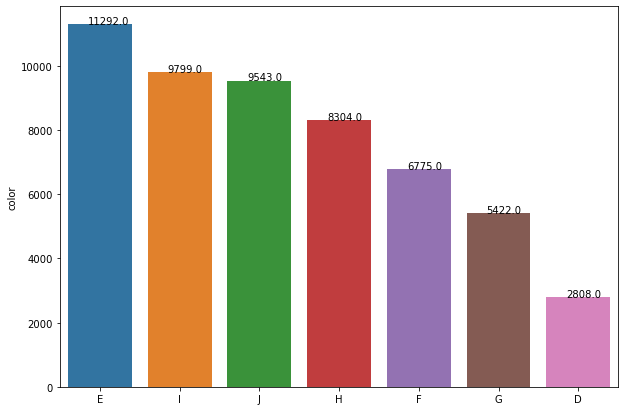

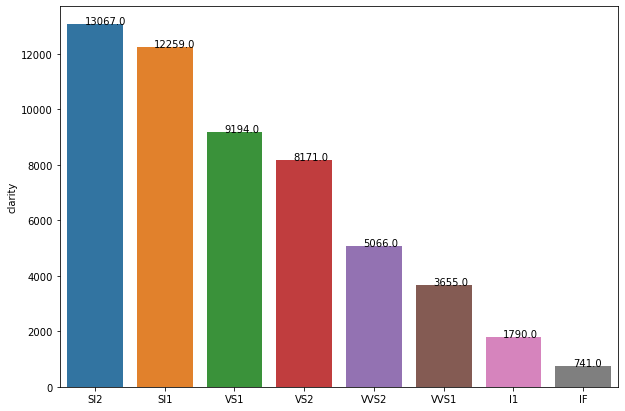

In [10]:
for feature in categorical_features:
  plt.figure(figsize=(10,7))
  ax=sns.barplot(x=df[feature].unique(),y=df[feature].value_counts(),data=df)

  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [11]:
##Checking NUMERICAL CONTINUOUS FEATURE

numerical_continuous_feature=[feature for feature in df.columns if  df[feature].dtype=='float']
df[numerical_continuous_feature].head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

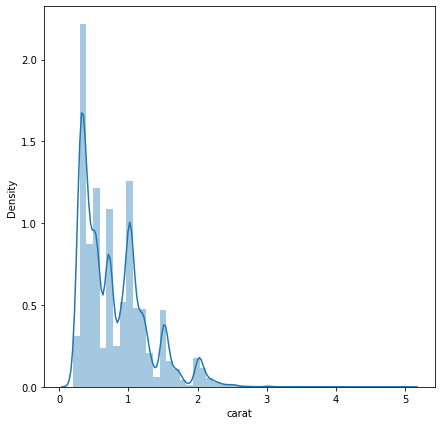

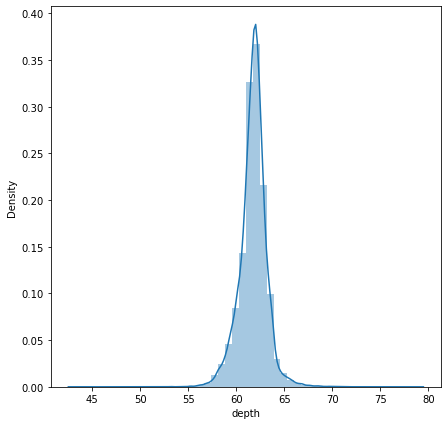

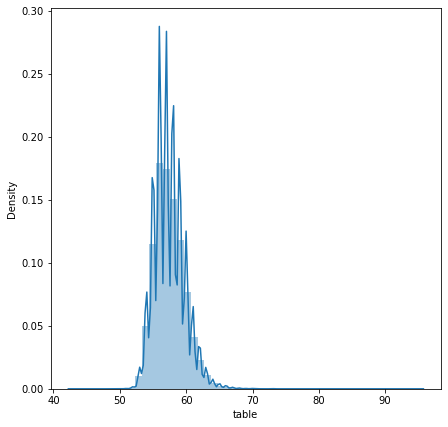

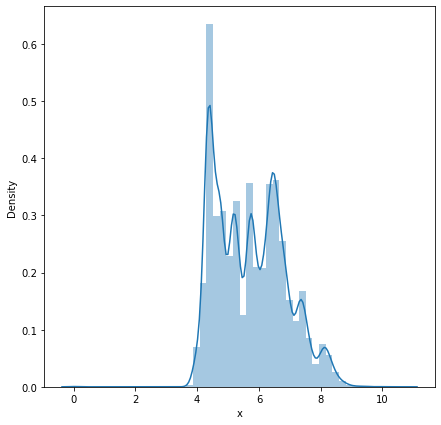

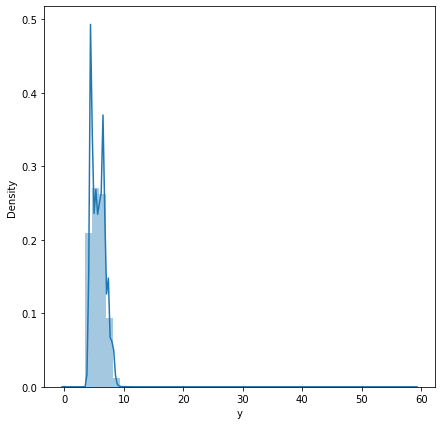

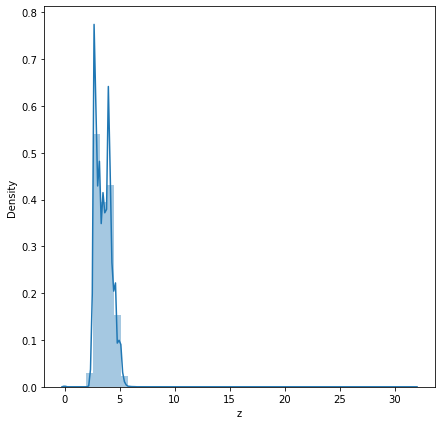

In [12]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.distplot(df[feature],kde=True)

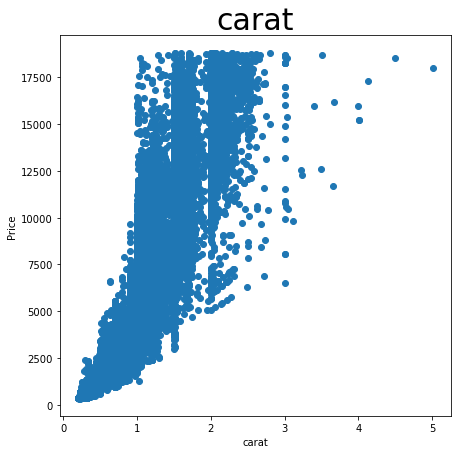

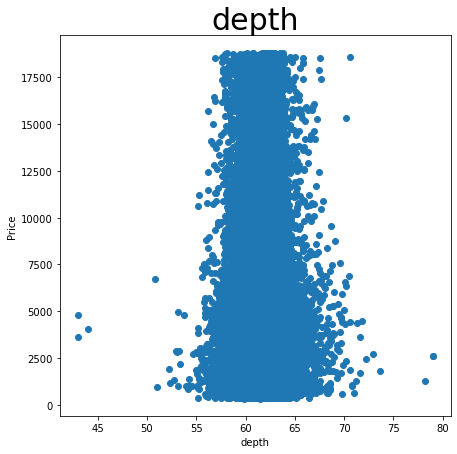

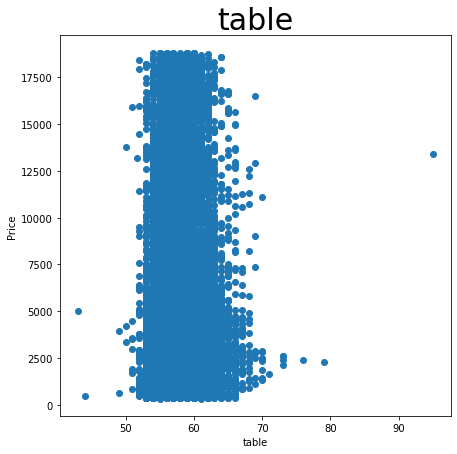

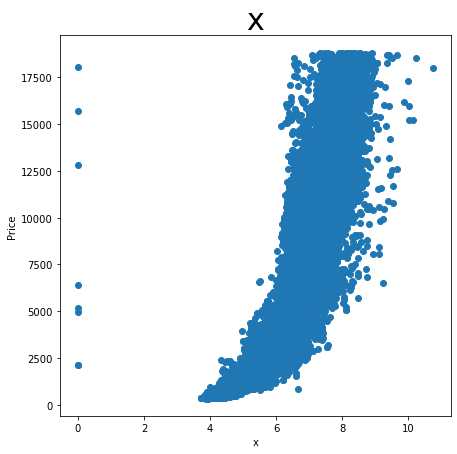

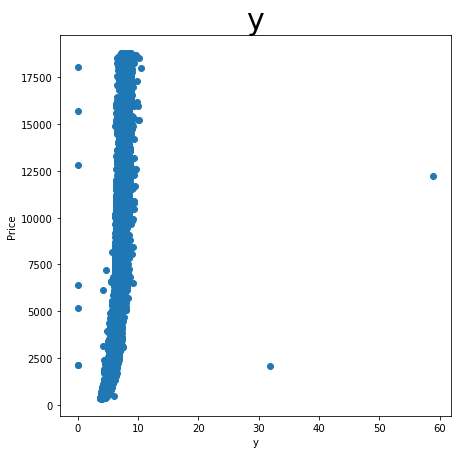

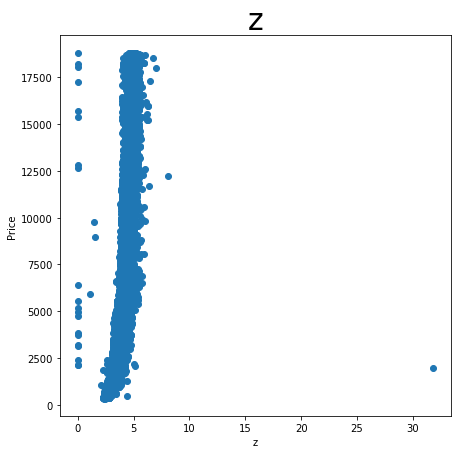

In [13]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='price',data=df)
  plt.xlabel(feature)
  plt.ylabel("Price")
  plt.title(feature,fontsize=30)

In [14]:
# => TABLE and DEPTH dont seem to have any relation with price , we can drop this feature but we will confirm this conclusion using heatmaps or pairplots
# => Before we go ahead with heatmaps and pairplots , lets do transformation of the data and see the relation with respect to price once again

In [15]:
for feature in numerical_continuous_feature:
    if feature == 'carat':
        df[feature]=np.log(df[feature]+1)
    else:
        df[feature]=np.log(df[feature])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

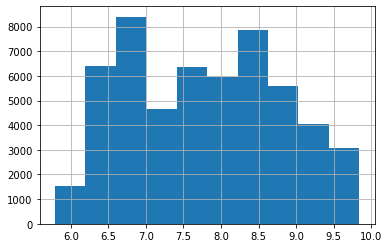

In [16]:
# Price histogram

df['price']=np.log(df['price'])
df['price'].hist()

In [17]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.207014,Ideal,E,SI2,4.119037,4.007333,5.786897,1.373716,1.381282,0.887891
1,0.190620,Premium,E,SI1,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
2,0.207014,Good,E,VS1,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248
3,0.254642,Premium,I,VS2,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
4,0.270027,Good,J,SI2,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601


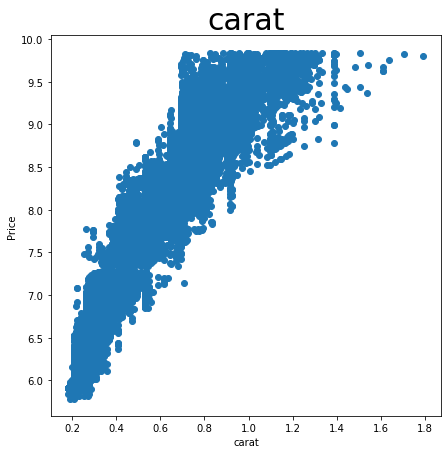

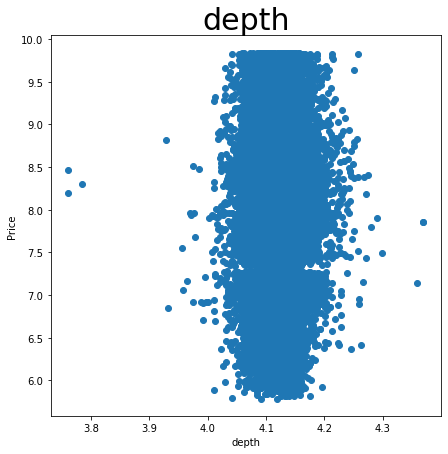

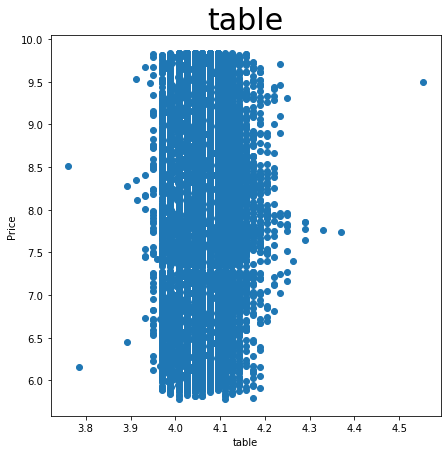

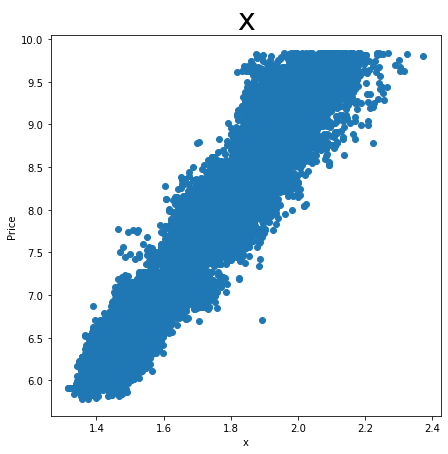

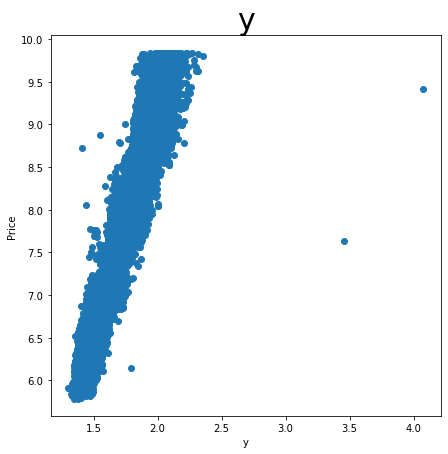

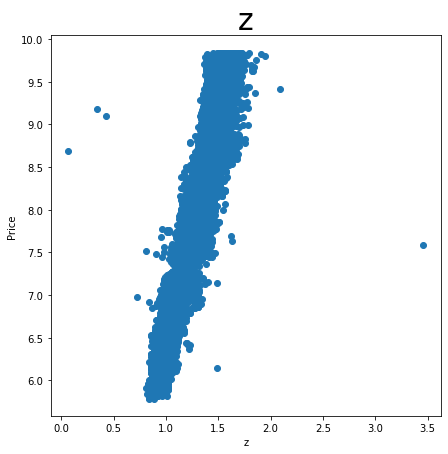

In [18]:
#df['carat']=df['carat'].astype(str)
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='price',data=df)
  plt.xlabel(feature)
  plt.ylabel("Price")
  plt.title(feature,fontsize=30)

In [19]:
#  => After the transformation, we can see very linear relationship in our feature

In [20]:
##Correlation matrice

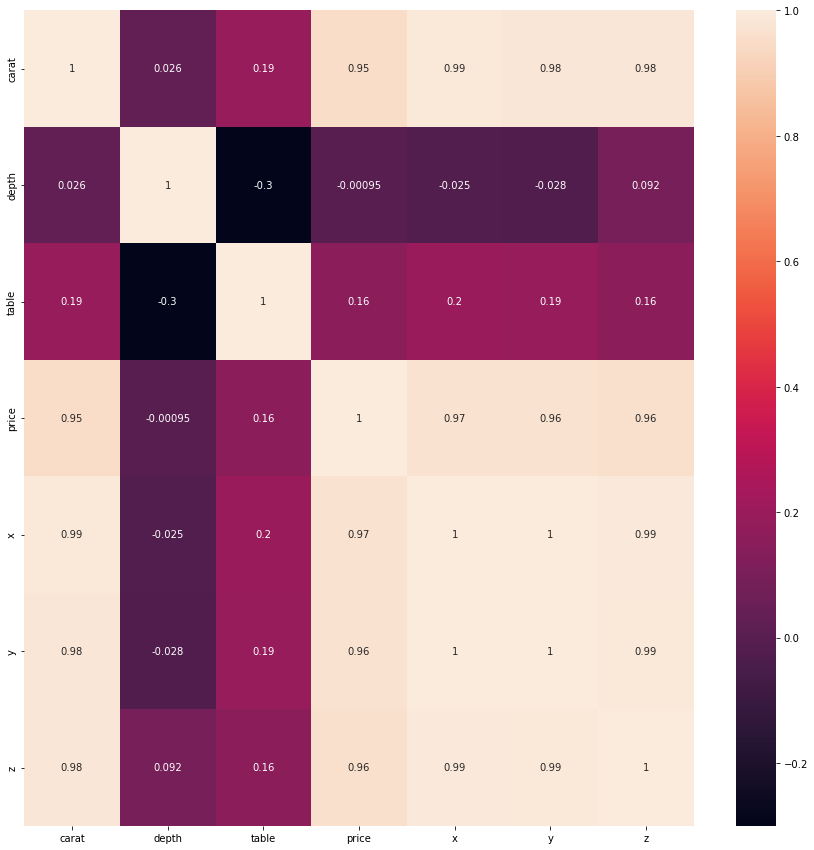

In [21]:
# checking the heatmaps and conclude if depth and table have any correlation with price
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
# => no correlation of table and depth feature with respect to price , we can drop them but as we dont have many features, we will still hold on to it
# => 'Carat', X','Y','Z' have very strong correlation with the price

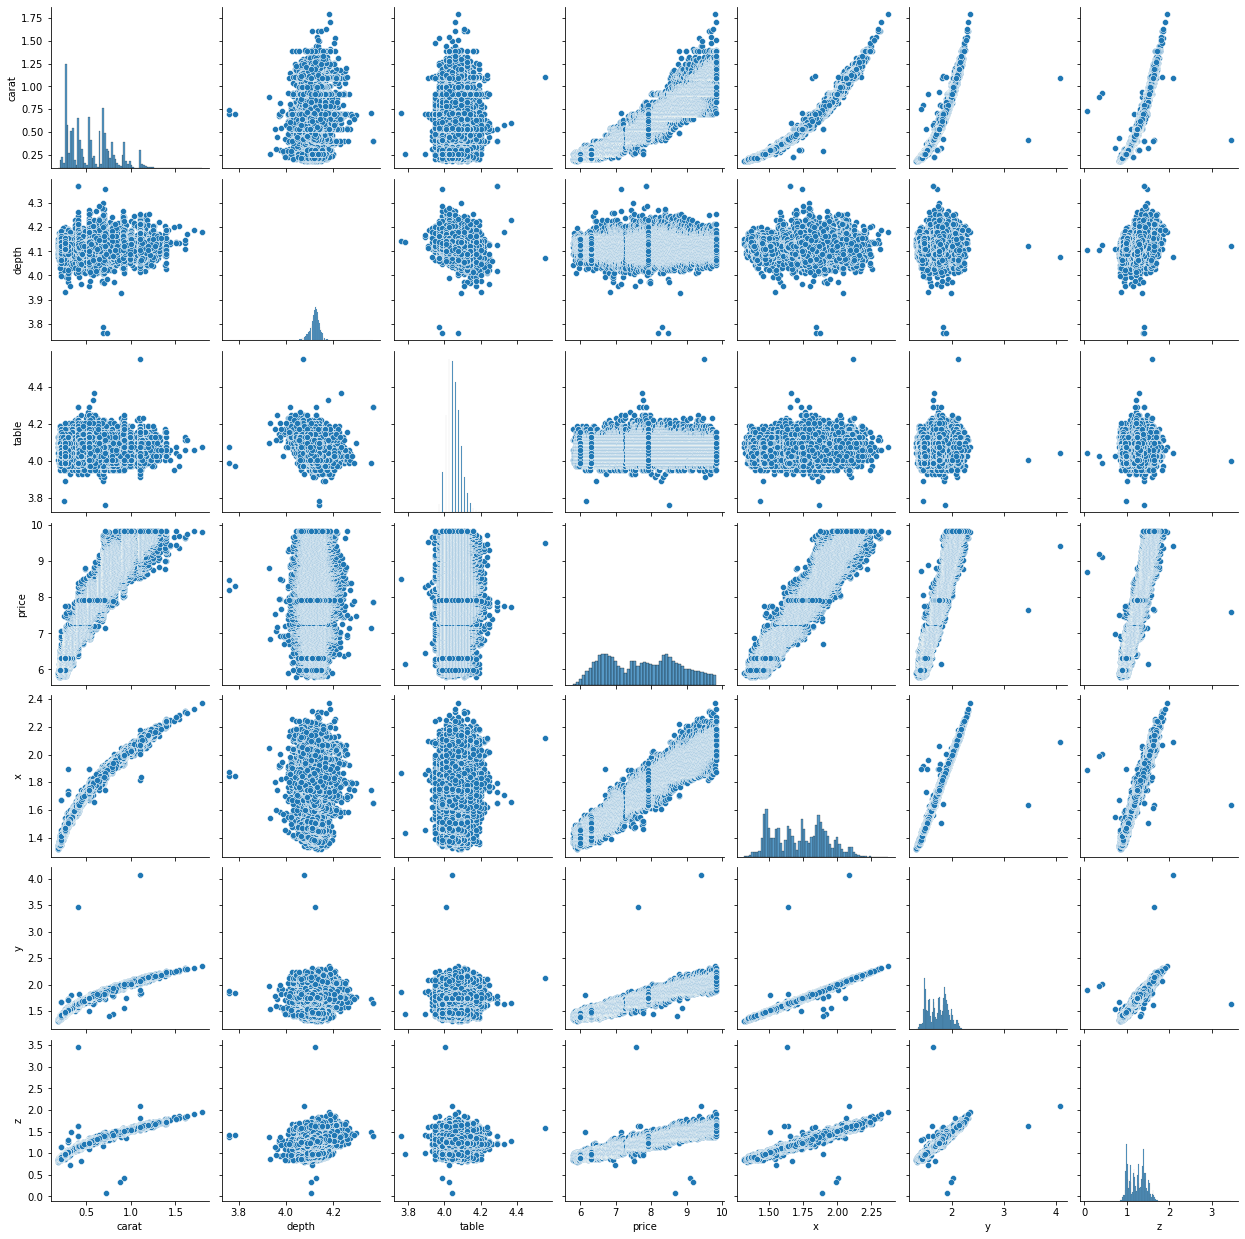

In [23]:
sns.pairplot(data=df)

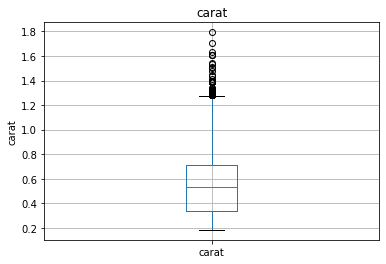

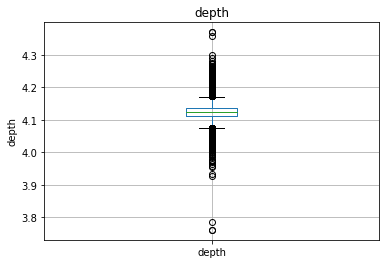

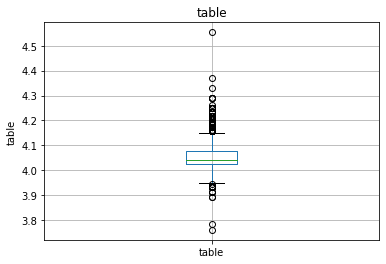

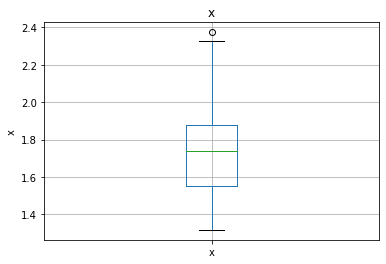

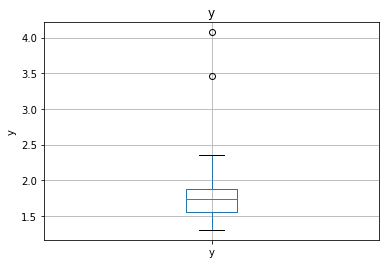

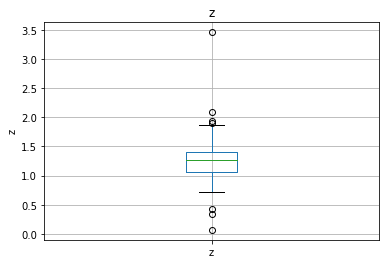

In [24]:
#looking into outliers
for feature in numerical_continuous_feature:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [25]:
#We have outliers in the dataset especially table and depth 

In [26]:
#Drop outliers using IQR method
for feature in numerical_continuous_feature:
  q1=df[feature].quantile(0.25)
  q3=df[feature].quantile(0.75)

  iqr=q3-q1

  min=q1-1.5*iqr
  max=q3+1.5*iqr

  ##filter the df data 
  df=df[(df[feature]>=min) & (df[feature]<=max)]

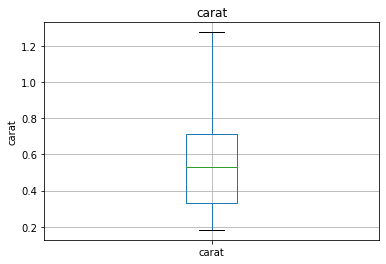

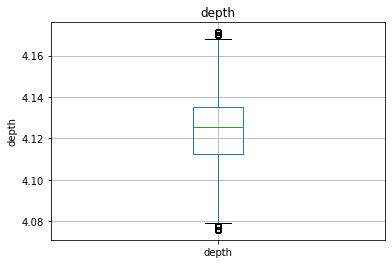

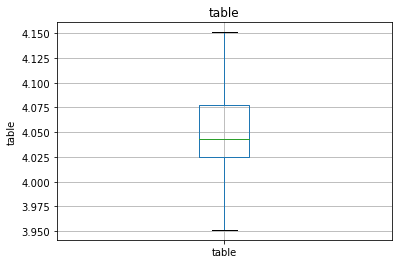

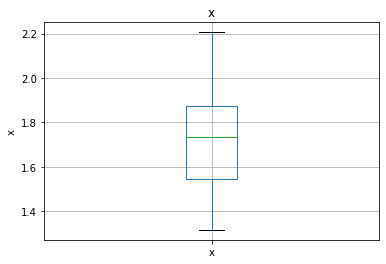

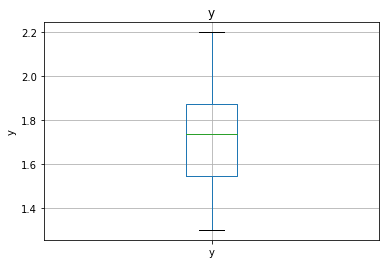

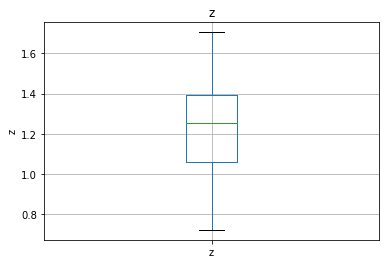

In [27]:
for feature in numerical_continuous_feature:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [28]:
## Encodeing cateogrical features

In [29]:
df['cut'].unique()


array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [30]:
# fair < good < v.good < premium < ideal 
cut_map={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
df['cut']=df['cut'].map(cut_map)

In [31]:
df['color'].unique()


array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [32]:
color_map={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
df['color']=df['color'].map(color_map)

In [33]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [34]:
clarity_map={'I1':1,'SI2':2, 'SI1':3,'VS2':4,'VS1':5,'VVS2':6, 'VVS1':7,'IF':8}
df['clarity']=df['clarity'].map(clarity_map)

In [35]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.207014,5,6,2,4.119037,4.007333,5.786897,1.373716,1.381282,0.887891
1,0.190620,4,6,3,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
3,0.254642,4,2,4,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
4,0.270027,2,1,2,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601
5,0.215111,3,1,6,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259


In [36]:
X=df.drop(['price'],axis=1)
y=df['price']

In [37]:
#spliting our dependent and independent feature
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

## Machine Learnig Algorithm Exploration
#### Using 6 different methods and comparing them to see which one reached the best prediction
#### Linear Regression
#### K Neighbors Regressor
#### Gradient Boosting Regressor
#### AdaBoost Regressor
#### Random Forest Regressor
#### SVR

## In-Sample Validation
#### Cross-Validation results - We trained the model through 5 subsets and we evaluated the results with the mean absolute error scores. MAE scores obtained: [0.06362084 0.06342369 0.06294201 0.06408969 0.062644 ]
#### Training results - We observed our features with heatmaps to discover if the features have strong relation with the price so that model performs well in the training process.
#### Test results - In the testing phase and after predicting some prices, we evaluated our results with R2_score which is used for measuring R-squared values and we got this score: 0.99

In [38]:
#Cross validation

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

In [40]:
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.98
Ridge Regression-Test set score: 0.98


In [41]:
print(X_train.shape)
print(X_test.shape)

(35564, 9)
(15243, 9)


In [42]:
#using a minmaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_X_train= pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)

In [43]:
##Models prediction (with cross validation)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR


In [45]:
#Linear regression model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.11139541 0.11159679 0.11083039 0.11227781 0.11078675]


In [46]:
print("Linear Regression")
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)


Linear Regression


0.9806213815781025

In [47]:
#KNeighborsRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', KNeighborsRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.09060425 0.09198543 0.08860389 0.08846796 0.08802708]


In [48]:
print("K Neighbors Regressor")
model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)


K Neighbors Regressor


0.9840242431957327

In [49]:
#GradientBoostingRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', GradientBoostingRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.08063361 0.07923556 0.07961169 0.07899173 0.07868828]


In [50]:
print("Gradient Boosting Regressor")
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)


Gradient Boosting Regressor


0.9899096037700589

In [51]:
#AdaBoostRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', AdaBoostRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.14489449 0.14194856 0.14701446 0.14478515 0.14489128]


In [52]:
print("AdaBoost Regressor")
model=AdaBoostRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)


AdaBoost Regressor


0.969000276860113

In [53]:
#RandomForestRegressor model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.06388411 0.06277455 0.06247845 0.06316348 0.06303084]


In [54]:
print("Random Forest Regressor")
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

Random Forest Regressor


0.9926973348542615

In [55]:
#SVR model
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', SVR())
                             ])


scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores: ", scores)

MAE scores:  [0.09460435 0.09400827 0.09284151 0.09496349 0.09266162]


In [56]:
print("SVR")
model=SVR(kernel = 'rbf')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

SVR


0.9864552807274132

## Peformance of ML Algorithms
#### Linear regression - MAE Cross validation scores was  .... and R2-score was ...
#### K Neighbors Regressor - MAE Cross validation scores was  .... and R2-score was ...
#### Gradient Boosting Regressor - MAE Cross validation scores was  .... and R2-score was ...
#### AdaBoost Regressor - MAE Cross validation scores was  .... and R2-score was ...
#### Random Forest Regressor - MAE Cross validation scores was  .... and R2-score was ...
#### SVR - MAE Cross validation scores was  .... and R2-score was ...

## Ensemble Technique Applied
#### We did the transformation and regularization by using ridge and lasso regression and it help to improve our model performance.

In [57]:
# Input wanted feature of a diamond to predict the price

df2 = df
df2 = df2.drop(['price'],axis=1)
data = {'carat': 2.1, 'clarity': 3.0, 'z': 1.843}
df2 = df2.append(data, ignore_index=True)
df2.fillna(method='ffill', inplace=True)
print('Unfilled features will be filled with the latest data rows:')
print(df2.tail(1))

Unfilled features will be filled with the latest data rows:
       carat  cut  color  clarity     depth     table         x         y  \
50807    2.1  3.0    6.0      3.0  4.102643  4.077537  1.742219  1.750937   

           z  
50807  1.843  


/var/folders/hv/3sn5r27931vgncc4b6s_jk3h0000gn/T/ipykernel_1840/2358620646.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(data, ignore_index=True)


In [58]:
df2 = df2._get_numeric_data()
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(df2.tail(1))
print('Predicted price: $' + str(np.exp(y_pred)))

Predicted price: $[7074.64044058]


## Conclusion
#### We applied several machine learning algorithms and conducted tests on them. The random forest regressor has the best result compared to others models.